In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

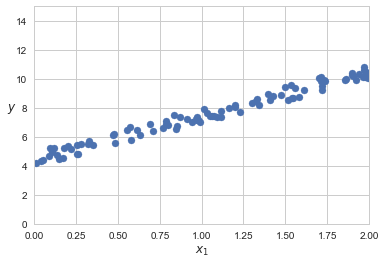

In [5]:
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12)
plt.axis([0,2, 0, 15])
plt.show()

### 1. 정규방정식 이해 & 암기 그리고 numpy로 구현 

In [9]:
X_b = np.c_[np.ones((100, 1)), X]
theat_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theat_best

array([[4.45686876],
       [2.97442194]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theat_best)
y_predict

array([[ 4.45686876],
       [10.40571264]])

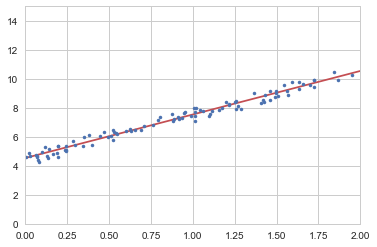

In [11]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0 ,15])
plt.show()

### 2. 모델의 learning Curves를 그리는 함수
* parameter : model, X, y
* 원리 
  1. 훈련/검증 데이터셋 분리
  2. 데이터를 하나씩 늘려가면서 학습 - 예측 그리고 검증
  3. mse(비용함수) 점수 추가

In [12]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_error), "b-", linewidth=3, label="val")

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

NameError: name 'LinearRegression' is not defined